*****Assignment 2.1*****

*Problem Statement*

Build a CNN for Cifar10 data

Importing Neccesary Libraries

In [1]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [2]:
import tensorflow as tf

Task 1



Load the cifar10 data

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 108s 1us/step


In [4]:
# summarizing the loaded dataset
print('Train: X= ' , (X_train.shape))
print('Train: y= ' , (y_train.shape))
print('Test:  X= ' , (X_test.shape))
print('Test:  y= ' , (y_test.shape))

Train: X=  (50000, 32, 32, 3)
Train: y=  (50000, 1)
Test:  X=  (10000, 32, 32, 3)
Test:  y=  (10000, 1)


In [5]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

Task 2

Display 10 random cifar images in one grid (subplots)

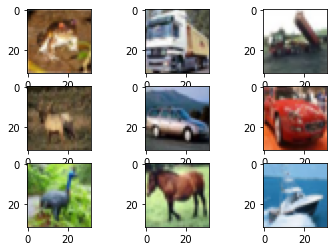

In [6]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
plt.show()

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Task 3

Build 2 Conv2D layer with 2 MaxPooling2D, filter 64, 32, and 16 respectively, padding true, activation relu, kernel size (3, 3), stride for Conv2d will be 1, for maxpool stride 2

In [9]:
model = tf.keras.models.Sequential([
                                      tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                                      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

                                      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                      tf.keras.layers.Dropout(0.25),

                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(32, activation='relu'),
                                      tf.keras.layers.Dropout(0.25),

                                      tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])
model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

Task 4

Use RMSprop optimizer, sparse categorical loss, and accuracy, epochs 10

In [11]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 104s 65ms/step - loss: 1.6501 - accuracy: 0.4069
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.2617 - accuracy: 0.5704
Epoch 3/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1129 - accuracy: 0.6299
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0296 - accuracy: 0.6581
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9791 - accuracy: 0.6764
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.9507 - accuracy: 0.6912
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9415 - accuracy: 0.6972
Epoch 8/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9528 - accuracy: 0.6973
Epoch 9/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9607 - accuracy: 0.7019
Epoch 10/10
1563/1563 [==============================] - 90s 58

Task 5

Calculate test set accuracy score and log loss, build confusion matrix

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [14]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)

In [15]:
print(accuracy_score(y_test, pred))

0.6925


In [16]:
print(log_loss(y_test, prob))

1.0134991969862508


In [17]:
import seaborn as sns

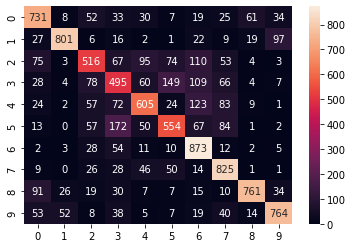

In [18]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.show()

Task 6

Display 10 random test set cifar images with actual and predicted value (use word cifar labels)

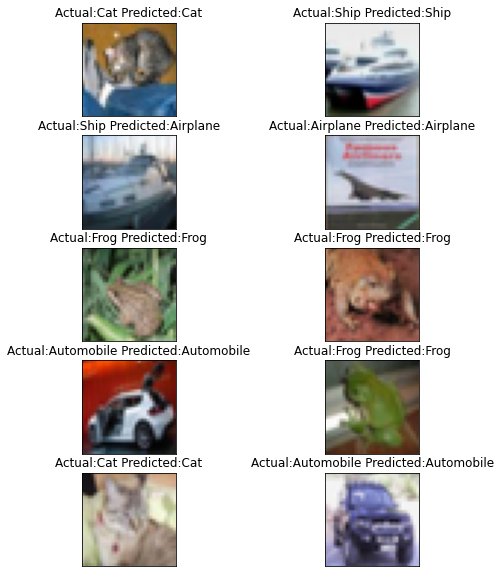

In [19]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    string = "Actual:"+ labels[y_test[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

***Assignment 2.2***

Problem Statement

Build a CNN for Cifar100 data

In [20]:
from keras.datasets import cifar100

Task 1

Load the cifar100 data

In [21]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 158s 1us/step


In [22]:
# summarizing the loaded dataset
print('Train: X= ' , (X_train.shape))
print('Train: y= ' , (y_train.shape))
print('Test:  X= ' , (X_test.shape))
print('Test:  y= ' , (y_test.shape))

Train: X=  (50000, 32, 32, 3)
Train: y=  (50000, 1)
Test:  X=  (10000, 32, 32, 3)
Test:  y=  (10000, 1)


Task 2

Build CNN, apply adam optimizer and early stopping callback with epochs 50

In [23]:
from keras.callbacks import EarlyStopping

In [24]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(y_train)), activation = 'softmax')
                             
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
es = EarlyStopping(monitor='accuracy', mode='max', patience = 2)

In [28]:
model.fit(X_train, y_train, epochs=50, callbacks=[es])


Epoch 1/50
1563/1563 [==============================] - 58s 36ms/step - loss: 4.3288 - accuracy: 0.0839
Epoch 2/50
1563/1563 [==============================] - 61s 39ms/step - loss: 3.4232 - accuracy: 0.1860
Epoch 3/50
1563/1563 [==============================] - 59s 37ms/step - loss: 3.0940 - accuracy: 0.2481
Epoch 4/50
1563/1563 [==============================] - 57s 37ms/step - loss: 2.8698 - accuracy: 0.2894
Epoch 5/50
1563/1563 [==============================] - 56s 36ms/step - loss: 2.6860 - accuracy: 0.3243
Epoch 6/50
1563/1563 [==============================] - 58s 37ms/step - loss: 2.5140 - accuracy: 0.3605
Epoch 7/50
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3743 - accuracy: 0.3900
Epoch 8/50
1563/1563 [==============================] - 59s 38ms/step - loss: 2.2476 - accuracy: 0.4158
Epoch 9/50
1563/1563 [==============================] - 58s 37ms/step - loss: 2.1084 - accuracy: 0.4489
Epoch 10/50
1563/1563 [==============================] - 59s 38m

Task 3

Calculate test set accuracy score and log loss, build confusion matrix

In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [38]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)

In [31]:
print(log_loss(y_test, prob))

5.7893517324669395


In [32]:
print(accuracy_score(y_test, pred))

0.2728


In [33]:
import seaborn as sns

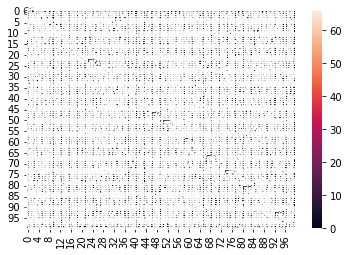

In [34]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, pred)

array([[66,  1,  2, ...,  0,  0,  0],
       [ 0, 33,  2, ...,  0,  1,  1],
       [ 0,  0, 23, ...,  1,  7,  0],
       ...,
       [ 0,  1,  0, ..., 11,  1,  0],
       [ 0,  1,  6, ...,  0, 15,  2],
       [ 1,  0,  0, ...,  0,  1, 18]], dtype=int64)